# Geopandas Examples

## Contents of Notebook
geopandas examples, mostly mapping from shapefiles


### Notebook magic commands

In [1]:
%matplotlib inline


### Notebook imports

In [7]:
# all imports should go here

import pandas as pd
import sys
import os
import subprocess
import datetime
import platform
import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
# seaborn seems to set some matplotlib defaulst on import, but its probably for the 
# greater good (?)
# import seaborn as sb
import geopandas as gpd
import shapely
from shapely.geometry import Polygon

import numpy as np
from matplotlib.collections import PatchCollection
from matplotlib.path import Path
import matplotlib.patheffects as PathEffects
from descartes import PolygonPatch

### Notebook version status

In [3]:
# show info to support reproducability

def python_env_name():
    envs = subprocess.check_output('conda env list').splitlines()
    # get unicode version of binary subprocess output
    envu = [x.decode('ascii') for x in envs]
    active_env = list(filter(lambda s: '*' in str(s), envu))[0]
    env_name = str(active_env).split()[0]
    return env_name
#end python_env_name

print('python version : ' + sys.version)
print('python environment :', python_env_name())
print('pandas version : ' + pd.__version__)

print('current wkg dir: ' + os.getcwd())
print('Notebook run at: ' + str(datetime.datetime.now())+ ' local time')
print('Notebook run at: ' + str(datetime.datetime.utcnow()) + ' UTC') 
print('Notebook run on: ' + platform.platform())


python version : 3.5.2 |Anaconda custom (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]
python environment : root
pandas version : 0.18.1
current wkg dir: C:\Users\donrc\Documents\JupyterNotebooks\GeopandasNotebookProject\develop
Notebook run at: 2017-02-28 21:21:15.421500 local time
Notebook run at: 2017-02-28 11:21:15.421500 UTC
Notebook run on: Windows-10-10.0.14393-SP0


### Customizations for notebook

In [4]:
# path to saved figures
FIGURE_PREFIX = '../figures/'

### Required notebooks to be run first

In [5]:
pass

## Examples

These are taken from the geopandas documentation

Read example data sets that seem to be shapefiles sets

In [11]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

Set the color map while plotting

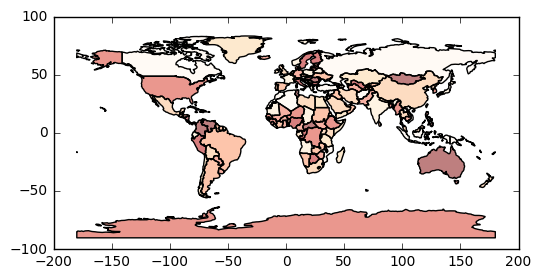

In [7]:
world.plot(cmap='OrRd')
#cities.plot()

Filter the data geo-wise, and compute an attribute that can be used to set country color

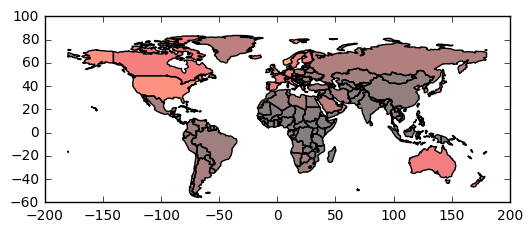

In [8]:
# Plot by GDP per capta
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

world.plot(column='gdp_per_cap', cmap = 'hot');

Use different color map, show quartiles

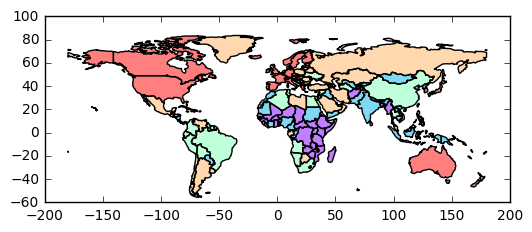

In [9]:
world.plot(column='gdp_per_cap', cmap='rainbow', scheme='quantiles');

Use the axes object returned by a geopandas plot call to overlay the next layer

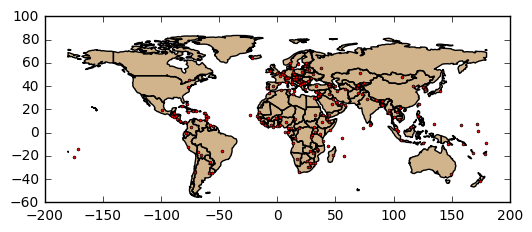

In [10]:
base = world.plot(color='tan', alpha=1)

cities.plot(ax=base, marker='o', color='red', markersize=2);

Try different order of drawing

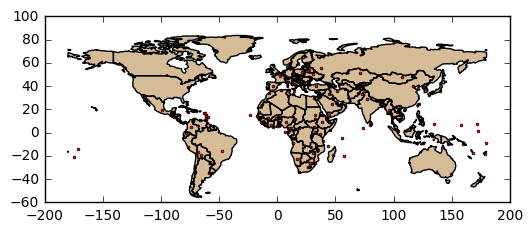

In [11]:

cax = cities.plot( marker='o', color='red', markersize=2, alpha=1);
p = world.plot(ax=cax, color='tan', alpha=0.9)

Example of overlaying two datasets, both going on a single axes object.

world seems to be drawn at lowest z order

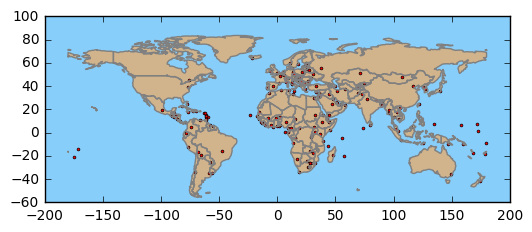

In [12]:
fig, ax = plt.subplots()

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

water = 'lightskyblue'
earth = 'tan'

ax.set_axis_bgcolor(water)

cities.plot(ax=ax, marker='o', color='red', markersize=2);
base = world.plot(ax=ax, edgecolor='grey', facecolor=earth, linewidth=1, alpha=1)

#cities.plot(ax=ax, marker='o', color='red', markersize=2);

Draw a subset of the globe, but with all the data (slower)

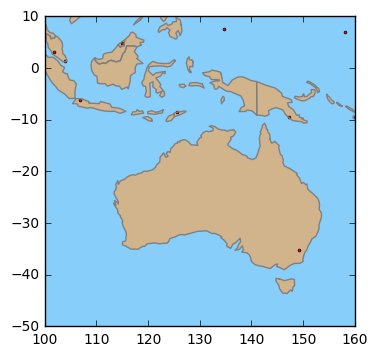

In [13]:
fig, ax = plt.subplots()

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

water = 'lightskyblue'
earth = 'tan'

ax.set_axis_bgcolor(water)

ax.set_xlim([100, 160])
ax.set_ylim([-50, 10])

cities.plot(ax=ax, marker='o', color='red', markersize=2);
base = world.plot(ax=ax, edgecolor='grey', facecolor=earth, linewidth=1, alpha=1)

#cities.plot(ax=ax, marker='o', color='red', markersize=2);

Read the Australian LGA shapefiles

In [7]:
'''Within the files, the States/Territories (S/T) are identified by unique one digit codes.


Code	S/T
1	New South Wales
2	Victoria
3	Queensland
4	South Australia
5	Western Australia
6	Tasmania
7	Northern Territory
8	Australian Capital Territory
9	Other Territories
'''

lga = gpd.read_file('../data/shapefiles/LGA11aAust.shp')

In all States and the Northern Territory each incorporated area has an official status. In this ASGS edition, the various LGA status types currently in use are:

New South Wales: Cities (C) and Areas (A)

Victoria: Cities (C), Rural Cities (RC), Boroughs (B) and Shires (S)

Queensland: Cities (C), Shires (S), Towns (T) and Regional Councils (R)

South Australia: Cities (C), Rural Cities (RC), Municipalities/Municipal Councils (M), District Councils (DC), Regional Councils (RegC), Towns (T) and Aboriginal Councils (AC)

Western Australia: Cities (C), Towns (T) and Shires (S)

Tasmania: Cities (C) and Municipalities (M)

Northern Territory: Cities (C), Towns (T), Municipalities (M) and Shires (S).

In [15]:
lga.head()

,LGA_CODE11,LGA_NAME11,STATE_CODE,geometry
0,10050,Albury (C),1,"POLYGON ((146.913830016 -36.006923005, 146.915..."
1,10110,Armidale Dumaresq (A),1,"POLYGON ((151.53576992 -30.458317424, 151.5357..."
2,10150,Ashfield (A),1,"POLYGON ((151.121228 -33.8955616835, 151.12108..."
3,10200,Auburn (C),1,"POLYGON ((151.015132992 -33.863216006, 151.015..."
4,10250,Ballina (A),1,"(POLYGON ((153.570837952 -28.87379901, 153.570..."


In [16]:
lga['STATE_CODE'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

Filter out just QLD

In [8]:
lgaq = lga[lga['STATE_CODE']=='3']

In [18]:
lgaq.head()

,LGA_CODE11,LGA_NAME11,STATE_CODE,geometry
233,30250,Aurukun (S),3,"(POLYGON ((142.182215008 -12.6070360005, 142.1..."
234,30300,Balonne (S),3,"POLYGON ((149.043094368 -28.9273995965, 149.04..."
235,30370,Banana (S),3,"POLYGON ((148.90072 -25.7600890035, 148.924079..."
236,30410,Barcaldine (R),3,"POLYGON ((145.894428992 -23.821467991, 145.866..."
237,30450,Barcoo (S),3,"POLYGON ((142.395412192 -23.613816147, 142.431..."


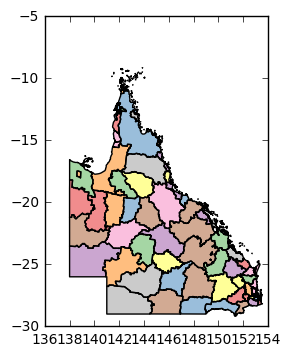

In [19]:
lgaq.plot(cmap='Set1')

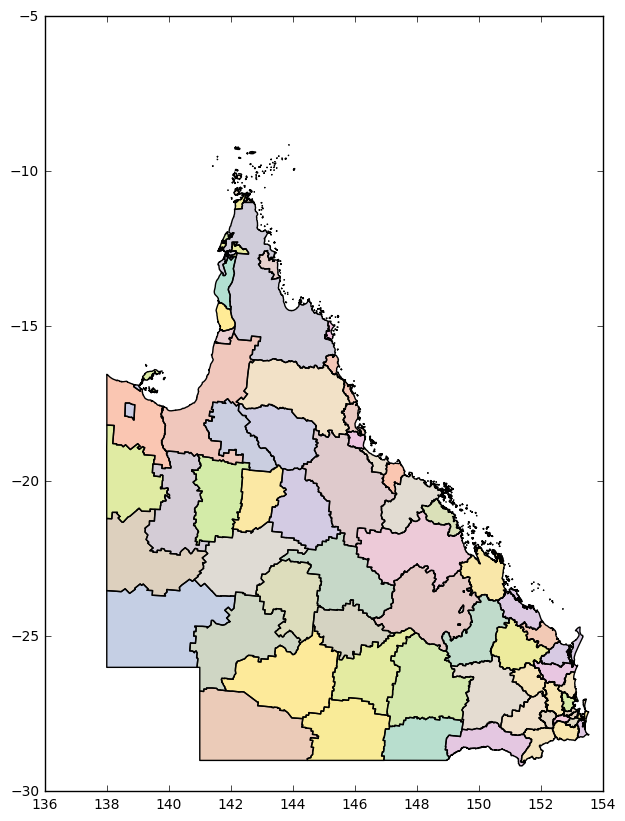

In [9]:
lgaq.plot(column='LGA_NAME11', categorical=True, legend=False, figsize=(14,10), cmap='Set2');

Combine the world data set with the LGA Qld dataset

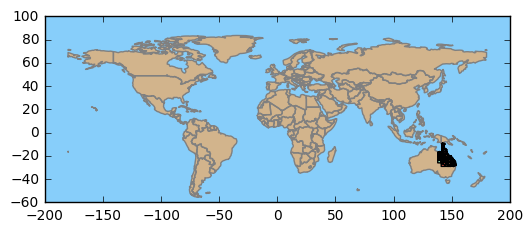

In [21]:
fig, ax = plt.subplots()

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

water = 'lightskyblue'
earth = 'tan'

ax.set_axis_bgcolor(water)
base = world.plot(ax=ax, edgecolor='grey', facecolor=earth, linewidth=1, alpha=1)

lgaq.plot(cmap='rainbow',ax=ax)

Subset to just SE Qld at matplotlib level; note need hi-res coastline data to match LGA boundaries

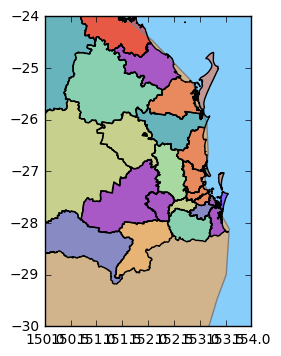

In [12]:
fig, ax = plt.subplots()

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')
ax.set_xlim([150,154])
ax.set_ylim([-30,-24])

water = 'lightskyblue'
earth = 'tan'

ax.set_axis_bgcolor(water)
base = world.plot(ax=ax, edgecolor='grey', facecolor=earth, linewidth=1, alpha=1)

lgaq.plot(cmap='rainbow',ax=ax)

# filtering at geometric level

refer to 

https://borealperspectives.wordpress.com/2016/03/07/plotting-polygon-shapefiles-on-a-matplotlib-basemap-with-geopandas-shapely-and-descartes/

Just show SE Qld;  only LGA that full completely or partially inside bounding box

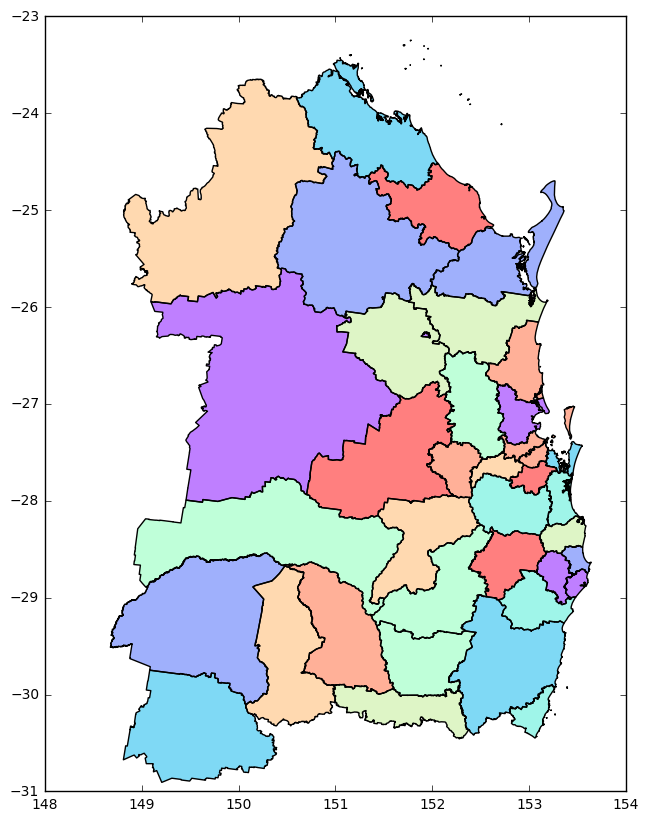

In [13]:

studyarea = shapely.geometry.box(150., -30., 154., -24.)
ax1 = lga[lga.geometry.intersects(studyarea)].plot(cmap='rainbow')
ax1.set_aspect('equal')
fig = plt.gcf()
fig.set_size_inches(10, 10)

### Create a high quality map background with Basemap

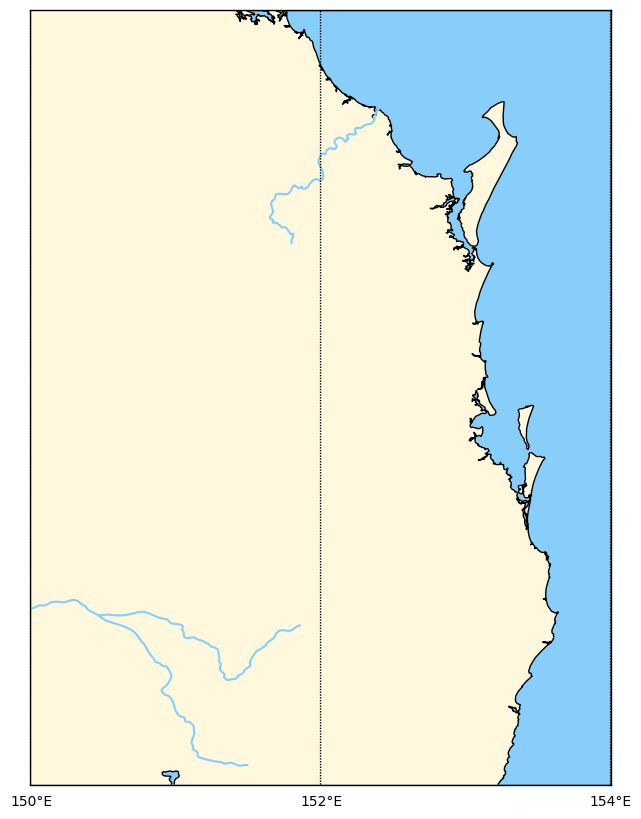

In [24]:
water = 'lightskyblue'
earth = 'cornsilk'

 
fig, ax1 = plt.subplots(figsize=(12, 10))
mm = Basemap(projection='cea',llcrnrlat=-30,urcrnrlat=-24,\
            llcrnrlon=150,urcrnrlon=154,resolution='h')
coast = mm.drawcoastlines()
rivers = mm.drawrivers(color=water, linewidth=1.5)
continents = mm.fillcontinents(
    color=earth,
    lake_color=water)
bound= mm.drawmapboundary(fill_color=water)
countries = mm.drawcountries()
merid = mm.drawmeridians(
    np.arange(-180, 180, 2), 
    labels=[False, False, False, True])
parall = mm.drawparallels(
    np.arange(0, -80), 
    labels=[True, True, False, False])

### Draw geographic map, and then add LGA boundaries usingBasemap

each patch making up an LGA will be assigned a code no unique that that LGA, for later color assignment

 Adding LGAs ...


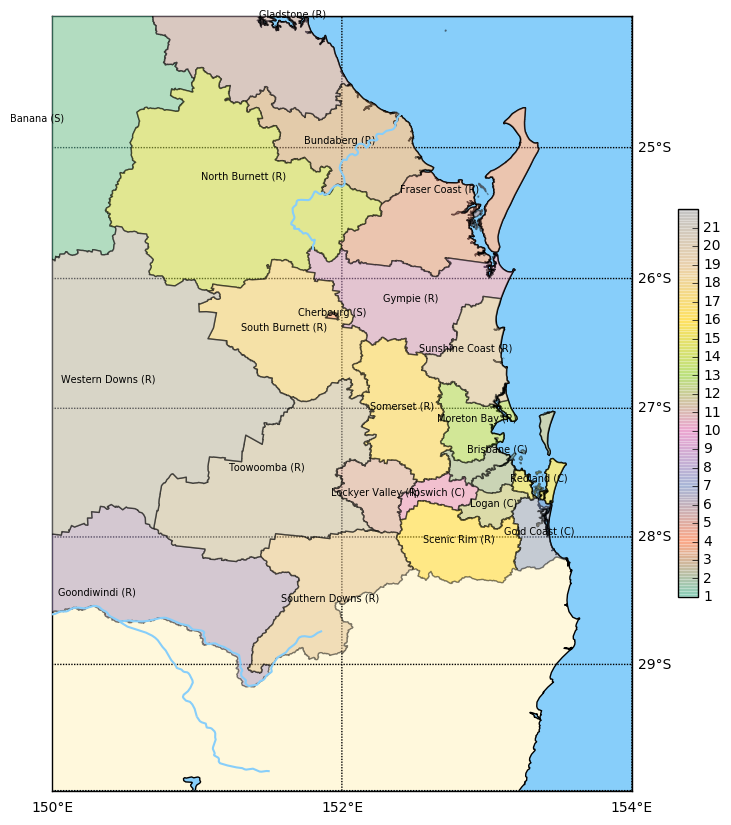

In [25]:
water = 'lightskyblue'
earth = 'cornsilk'

# -----------------------------------------
# draw the background high res map
# -----------------------------------------
fig, ax1 = plt.subplots(figsize=(12, 10))
mm = Basemap(projection='cea',llcrnrlat=-30,urcrnrlat=-24,\
            llcrnrlon=150,urcrnrlon=154,resolution='h')
coast = mm.drawcoastlines()
rivers = mm.drawrivers(color=water, linewidth=1.5, zorder=4)
continents = mm.fillcontinents(
    color=earth,
    lake_color=water)
bound= mm.drawmapboundary(fill_color=water)
countries = mm.drawcountries()
merid = mm.drawmeridians(
    np.arange(-180, 180, 2), 
    labels=[False, False, False, True])
parall = mm.drawparallels(
    np.arange(-80, 0), 
    labels=[False, True, True, True])

# --------------------------------------------
# now go through all LGAs with a QLD state code, inside the bounding box
# --------------------------------------------
print(' Adding LGAs ...')
# patches will hold the shapefile polygons
patches = []
# colors will hold the color for each patch
colors  = []
pnames   = []

studyarea = shapely.geometry.box(150., -30., 154., -24.)
selection = lgaq[lgaq.geometry.intersects(studyarea)]

# get all unique LGA names in selection
names = selection['LGA_NAME11'].unique()

# map each name to an integer in a dict
name_color = {}
for i, name in enumerate(names):
    name_color[name] = i
#end for

# -------------------------------------------
# for each LGA in area, get the polygon patches that make up the LGA
# -------------------------------------------
#for poly in selection.geometry:
for poly,name in zip(selection.geometry, selection.LGA_NAME11):
    
    if poly.geom_type == 'Polygon':
        mpoly = shapely.ops.transform(mm, poly)
        ptemp = PolygonPatch(mpoly)
        ptemp.label = name
        patches.append(ptemp)
        colors.append(name_color[name]+1)
        pnames.append(name)
    elif poly.geom_type == 'MultiPolygon':
        for subpoly in poly:
            mpoly = shapely.ops.transform(mm, subpoly)
            ptemp = PolygonPatch(mpoly)
            ptemp.label = name
            patches.append(ptemp)
            colors.append(name_color[name]+1)
            pnames.append(name)
        #end for
    else:
        print(poly, 'is neither a polygon nor a multi-polygon. Skipping it.')
    #end if
#end for
# set patch colors
p = PatchCollection(patches, match_original=True, 
                           alpha=0.5,  zorder=3, cmap='Set2')

p.set_array(np.array(colors))
seqld = ax1.add_collection(p)


# label LGA with text at center of bounding box
for poly,name in zip(selection.geometry, selection.LGA_NAME11):
    lon1,lat1,lon2,lat2 = poly.bounds
    x1,y1 = mm(lon1,lat1)
    x2,y2 = mm(lon2,lat2)
    
    ax1.text((x1+x2)/2.0 , (y1+y2)/2.0, name, fontsize=7, ha='center')
#end for

fig.colorbar(p, ax=ax1, shrink =0.5, ticks = range(len(names)))

plt.show()

## Use labels to build a legend

 Adding LGAs ...


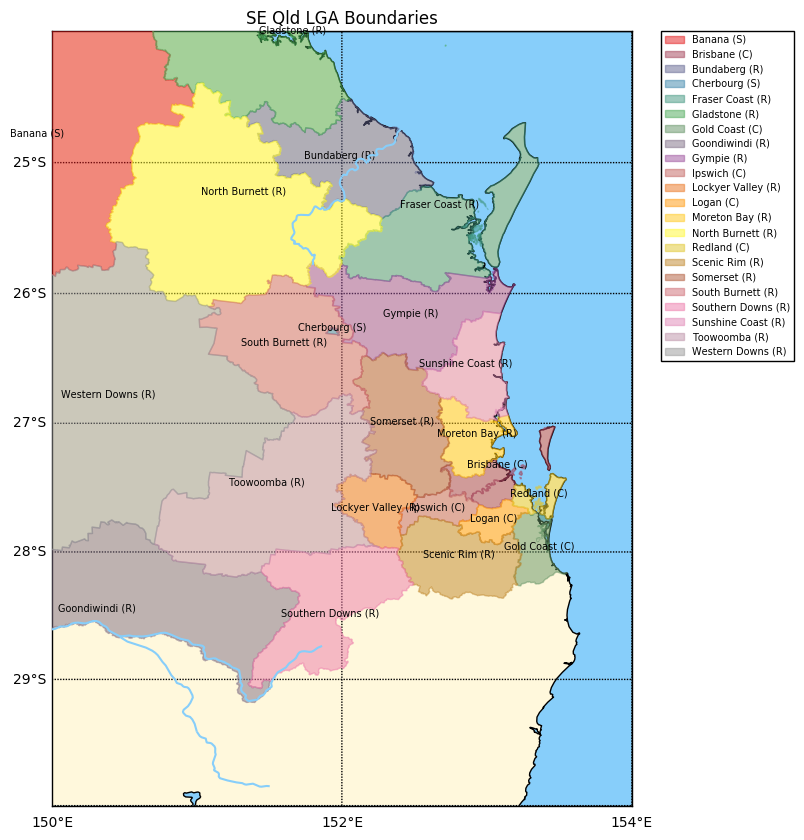

In [26]:
water = 'lightskyblue'
earth = 'cornsilk'

# -----------------------------------------
# draw the background high res map
# -----------------------------------------
fig, ax1 = plt.subplots(figsize=(12, 10))
mm = Basemap(projection='cea',llcrnrlat=-30,urcrnrlat=-24,\
            llcrnrlon=150,urcrnrlon=154,resolution='h')
coast      = mm.drawcoastlines()
rivers     = mm.drawrivers(color=water, linewidth=1.5, zorder=4)
continents = mm.fillcontinents(
    color=earth,
    lake_color=water)
bound     = mm.drawmapboundary(fill_color=water)
countries = mm.drawcountries()
merid     = mm.drawmeridians(
    np.arange(-180, 180, 2), 
    labels=[False, False, False, True])
parall    = mm.drawparallels(
    np.arange(-80, 0), 
    labels=[True, False, False, False])

# --------------------------------------------
# now go through all LGAs with a QLD state code, inside the bounding box
# --------------------------------------------
print(' Adding LGAs ...')
# patches will hold the shapefile polygons
patches = []
# colors will hold the color for each patch
colors  = []
pnames   = []

studyarea = shapely.geometry.box(150., -30., 154., -24.)
selection = lgaq[lgaq.geometry.intersects(studyarea)]

# get all unique LGA names in selection
names = selection['LGA_NAME11'].unique()

# get a color for each unique name
N = len(names)
base = plt.cm.get_cmap('Set1')
color_list = base(np.linspace(0, 1, N))

# map each name to a color in a dict
name_color = {}
for name,color in zip(names, color_list):
    name_color[name] = color
#end for

#  all the patches with a single name grouped together for later coloring
name_patches = {name:[] for name in names}

# -------------------------------------------
# for each LGA in area, get the polygon patches that make up the LGA
# -------------------------------------------

for poly,name in zip(selection.geometry, selection.LGA_NAME11):
    
    if poly.geom_type == 'Polygon':
        mpoly = shapely.ops.transform(mm, poly)
        ptemp = PolygonPatch(mpoly)
        name_patches[name].append(ptemp)
    elif poly.geom_type == 'MultiPolygon':
        for subpoly in poly:
            mpoly = shapely.ops.transform(mm, subpoly)
            ptemp = PolygonPatch(mpoly)
            name_patches[name].append(ptemp)
        #end for
    else:
        print(poly, 'is neither a polygon nor a multi-polygon. Skipping it.')
    #end if
#end for


LGA_alpha = 0.5
for name in names:
    p = PatchCollection(name_patches[name], match_original=True, 
                               alpha=LGA_alpha,  zorder=3, 
                        color = name_color[name])
    x = ax1.add_collection(p)
#end for

# create invisible patches to create legend  (proxy artist)
import matplotlib.patches as mpatches
handles = [mpatches.Patch(color=name_color[name], label=name, alpha=LGA_alpha)\
           for name in names]


# label LGA with text at center of bounding box
for poly,name in zip(selection.geometry, selection.LGA_NAME11):
    lon1,lat1,lon2,lat2 = poly.bounds
    x1,y1 = mm(lon1,lat1)
    x2,y2 = mm(lon2,lat2)
    
    ax1.text((x1+x2)/2.0 , (y1+y2)/2.0, name, fontsize=7, ha='center')
#end for
plt.title('SE Qld LGA Boundaries')
plt.legend(handles=handles, fontsize=7, \
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.show()

## Geopandas high quality plot with legend

In [5]:
#  read Local Govt Area borders as at 20111
lga = gpd.read_file('../data/shapefiles/LGA11aAust.shp')
world = gpd.read_file('../data/shapefiles/ne_10m_admin_0_countries.shp')
ocean = gpd.read_file('../data/shapefiles/ne_10m_ocean.shp')

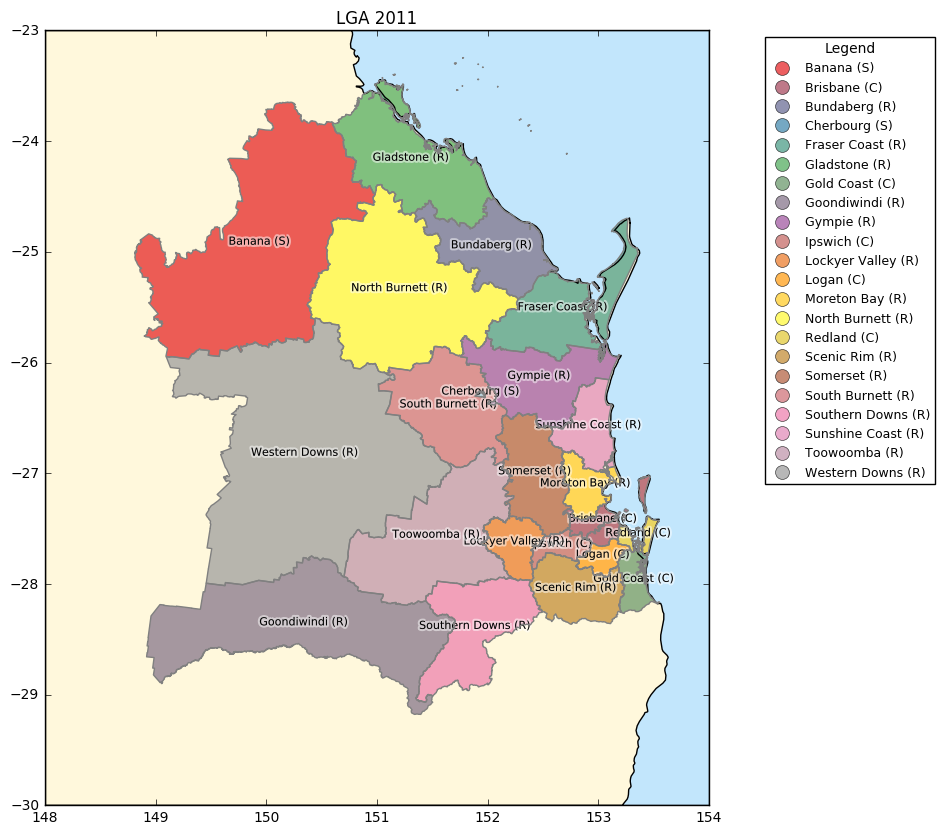

In [12]:
# set size and aspect ratio of plot, and legend text size
mpl.rcParams['legend.fontsize'] = 9
plt.rcParams['axes.facecolor']='white'
fig, ax = plt.subplots(figsize=(12,10))
ax.set_aspect('equal')

water = 'lightskyblue'
earth = 'cornsilk'

# -----------------------------------------
# draw the background oz map
# -----------------------------------------
# bounding box of region, note different box than clipper, allows for border for LGAs that stick out of bbox
studyarea = shapely.geometry.box(150., -30., 154., -24.)
clipper = gpd.GeoSeries(Polygon([(148,-30), (154,-30), (154,-23), (148,-23), (148,-30)]))
clipper.crs = {'init' :'epsg:4326'}

clipper_df = gpd.GeoDataFrame({'geometry':clipper, 'df1':[1]} )
clipper_df.plot(ax=ax, color=water)

# clip country to our box and plot
oz = world[world['ADMIN']=='Australia']
oz2 = gpd.overlay(oz, clipper_df, how='intersection')
oz2.plot(ax = ax, color=earth, alpha=1)


# confine plot to SE Qld
lgaq = lga[lga['STATE_CODE']=='3']
# note different box than above, allows for border for LGAs that stick out of bbox
# we dont want to clip LGAs, just filter out any that don't have any piece inside our smaller bbox
studyarea = shapely.geometry.box(150., -30., 154., -24.)
selection = lgaq[lgaq.geometry.intersects(studyarea)]

ax.set_title('LGA 2011')
selection.plot(ax = ax, column = 'LGA_NAME11', categorical = True, cmap='Set1',\
               legend=True, zorder=9, alpha=0.7, linewidth=1 , edgecolor='grey')

for g,n in zip(selection.geometry, selection.LGA_NAME11):
    x0,y0,x1,y1 = g.bounds
    txt = ax.text(g.centroid.x, g.centroid.y, s=n, fontsize=8, ha='center')
    txt.set_path_effects([PathEffects.withStroke(linewidth=3,
                                         foreground='white', alpha=0.5)])
#end for


leg = ax.get_legend()
leg.set_bbox_to_anchor((1.15, 0., 0.2, 1.0))
leg.set_title('Legend', )

plt.show()

In [65]:
test_df.head(1)


,Unnamed: 0,LGA_CODE11,LGA_NAME11,STATE_CODE,geometry
0,233,30250,Aurukun (S),3,"MULTIPOLYGON (((142.182215008 -12.6070360005, ..."


In [79]:
n = selection['LGA_NAME11'].unique()
print(n.size)

22


In [76]:
selection.head()

,LGA_CODE11,LGA_NAME11,STATE_CODE,geometry
235,30370,Banana (S),3,"POLYGON ((148.90072 -25.7600890035, 148.924079..."
240,31000,Brisbane (C),3,"(POLYGON ((153.1826568 -27.394093863, 153.1829..."
242,31820,Bundaberg (R),3,"(POLYGON ((152.491982144 -24.925893016, 152.49..."
250,32330,Cherbourg (S),3,"POLYGON ((151.901122816 -26.303876949, 151.887..."
258,33220,Fraser Coast (R),3,"(POLYGON ((152.936304992 -25.7435919985, 152.9..."


In [96]:
len(names)

22

In [102]:
for poly,name in zip(selection.geometry, selection.LGA_NAME11):
    print(name, poly.bounds)

Banana (S) (148.81308, -25.966084006, 150.98366, -23.646977008500002)
Brisbane (C) (152.67969312, -27.6603865815, 153.46848864, -27.021964587)
Bundaberg (R) (151.335786944, -25.4323420045, 152.63304192, -24.513761005)
Cherbourg (S) (151.886447168, -26.318701961000002, 151.979141216, -26.256303607)
Fraser Coast (R) (151.980124704, -25.985905498, 153.360352096, -24.696996031)
Gladstone (R) (150.598015008, -24.791922139500002, 152.718351136, -23.245454803)
Gold Coast (C) (153.168920192, -28.265189858, 153.552171232, -27.691833825)
Goondiwindi (R) (148.919517472, -29.1778976995, 151.707370208, -27.746523562)
Gympie (R) (151.75276, -26.5977089525, 153.192345856, -25.757006996)
Ipswich (C) (152.382786304, -27.865468979, 152.940978016, -27.490326996500002)
Lockyer Valley (R) (151.942075488, -27.977543015000002, 152.518658016, -27.385227997)
Logan (C) (152.799324992, -27.9385700085, 153.290514976, -27.587311008)
Moreton Bay (R) (152.651188992, -27.422374998000002, 153.207557664, -26.7922499945

### Display associated webpages (eg source of data)

In [4]:
pass

### Save figures to figures directory

../figures/TemplateNotebookFigure20161202-170413.jpg saved.


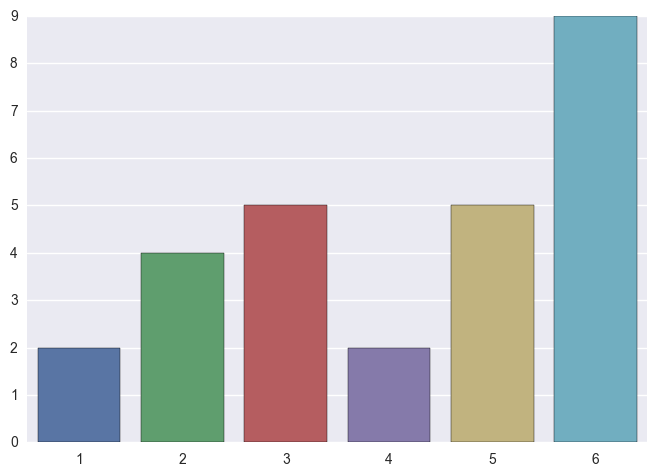

In [7]:
x         =[1,2,3,4,5,6]
y         =[2,4,5,2,5,9]

try:
    fig_title = 'TemplateNotebookFigure'
    plot2     = sb.barplot(x=x, y=y)
    fname     = FIGURE_PREFIX+fig_title+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+'.jpg'
    plt.savefig(fname)
    print(fname+' saved.')
except IOError as err:
    print('Unable to save figure - IO Error!')
    print("IO error: {0}".format(err))
except OSError as err:
    print('Unable to save figure - OS Error!')
    print("OS error: {0}".format(err))
except:
    print('Unable to save figure - Unexpected Error!')
    print("Unexpected error:", sys.exc_info()[0])
    raise
#end try

### Display images

In [5]:
pass

## Conclusions / Summary